# COGS 118A - Project Checkpoint

# Names

- Andy Chow
- Naomi Chin
- Andrew Lona
- Jiaqi Liu

# Abstract 

This project aims to make a model that can find the underlying factors that contribute to a person's financial health and how different demographics may affect the financial health. We will be using the UCI bank marketing data set to obtain demographic information. We will be using Support Vector Machine model and K Nearest Neighbors multiclass classification to predict bank account balances, with the possibly of using Principle Component Analysis to determine the most significant contributors to financial status. We will be using confusion matrix, F1 score, ROC-AUC score, learning curve, and AIC and BIC score comparison to evaluate model performance.

# Background

Making money and having a large bank account balance is a goal that many strive for. But what factors contribute to how much money people have in their accounts? There's the obvious job type and age that typically have an impact on salary and thus bank account balnce, but what other attributes have an influence, and to what degree?

There have been studies on how different demographics affect salary or bank account balance. For example, an article by ValuePenguin breaks down how income and age affect balances. Unsuprisingly, as income increases, the average balance increases. In addition, balance increases as age increases up to the 65-74 age range, but after 75+ years, the average balance decreases <a name="moon"></a>[<sup>[1]</sup>](#moonnote).
There are also a multitude of studies that have looked at how different personal attributes affect earnings. While earnings are not exactly bank account balance, we have already seen how income affect the balance. A report by Social Security found that men with bachelor's degrees earn about \\$900,000 more during their lifetime than men with only high school diplomas. For women, the difference is about \\$630,000. The report then took into account certain socio-demographic variables that could influence earnings; after recalculations, men and women with bachelor's  degrees earn \\$655,000 and \\$450,000, respectively, more than their high school graduate counterparts <a name="social"></a>[<sup>[2]</sup>](#socialnote). Further, Social Security looks into how savings are affected by marital status. It was found that married people were much more likely to have an individual retirement account (IRA) or defined contribution (DC). This likely means that married people are better at saving money due to multiple reasons. Cost sharing, long term commitment, and future-focused behavior may be contributers to this behavior <a name="relationship"></a>[<sup>[3]</sup>](#relationshipnote).

We are going to analyze not only what attributes collectively contribute to bank account balance, but also how much influence each attribute has. The goal of our research and analysis is to find what demographics and lifestyle choices correlate to bank account balances. While the results of this research are intended to be informative knowledge, they could serve as guidance to increase bank account balance. This information could also be used for banks to determine what clients to focus on.

# Problem Statement

The problem we hope to solve is, how well can a person’s demographic information predict their financial health? In this instance, financial health is determined by the balance of a person’s bank account (high is good, low is bad). Although a single bank account balance cannot directly indicate a person’s overall financial health, it is a reasonable assumption that a higher bank account balance correlates to better financial health. Our analysis will first determine which aspect of a person’s demographic information has the most influence on bank account balance through a Principal Component Analysis (PCA). Then we will determine how well a person’s age, job type, marital status, education level, credit in default status, housing loan holder status, and loan holder status contribute towards determining a person’s bank account balance. To predict the balances, we will compare Support Vector Machine (SVM) and K Nearest Neighbors (KNN) models for multiclass classification.

# Data

The data that will be used is the UCI bank marketing data set. It gives information of direct marketing campaigns of a Portuguese banking institution.

Data link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
- 17 of variables, 45211 observations
- each observation consists of one marketing call from a Portuguese banking institution to assess if the bank term deposit would be subscribed (by the client). These outcomes may not always results in subscription, and follow-up calls are sometimes made to the same client.
- critical variables are
    - balance: at the moment we are acting on assumption, but it should be the current account balance of the client contacted
    - independent variables such as (numerical age, job type, marital status, education level, credit in default status, housing loan holder status, and loan holder status)
- cleaning/transformations
    - the data is pretty spotless in a wrangling sense, albeit most of the categorical variables do have an unknown or nonexistent value which will need to be accounted for.
    - we will also need to one-hot encode all categorical IVs such as marital status and job type (not dummy coding).


# Proposed Solution


We are interested in predicting the bank account balance of individuals given their demographic data provided by the bank. Since the account balance variable is independent from other observations, we can convert the continuous range into categorical bins based on quartile ranges with the addition of "below 0". 


We will first perform a PCA to decorrelate the inputs to analyze the unique contributions from each variable. This will help us to determine what features are the most significant contributors to bank account balance.


We will then use a SVM model to conduct the multiple classification. In addition, preliminary observation of the target feature reveals that the mean is significantly smaller than the median, which indicates that there are outliers in the dataset. We will be using a ElasticNet regularization primarily to limit the influence of outliers in the L1 term but the L2 term also helps in reduction of the 17 present features. We will conduct a gradient descent with respect to the $\alpha$ term of the ElasticNet regularization since we are not completely sure how much to penalize for outliers. We will also apply a simple model using K Nearest Neighbors multiclass classification, and apply a model comparison metric to evaluate performance. We will use a Confusion Matrix and ROC-AUC analysis for model benchmarking to compare the SVM and KNN models.


We plan to use Pandas for data preprocessing and the modules provided in the SKLearn library to conduct our model implementation.


# Evaluation Metrics

Since we are dealing with a multiclass problem, in order to complete a general performance evaluation of models, we will convert our classes into multiple one-vs-rest classifications. For each instance, we will take each bank account bin as the positive class and all of the other bins as the negative class. So we will have n binary classifications where n is the number of bank account bins.


From there, we can create a confusion matrix for each on-vs-rest classification. The true and predicted classes will be used as inputs and the true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) will be the outputs of the confusion matrix. We can then aggregate the TP, TN, FP, and FN from all of the classifications. 


With the aggregate values, we will calculate the F1 score for each model. The F1 score is chosen because neither false positives nor false negatives are particularly penalizing to the final performance of the model. The F1 score is a function of precision and recall which account for false positives and false negatives, respectively. 


$ Precision = \frac{TP}{TP+FP} \\ Recall = \frac{TP}{TP+FN} \\ F1 = \frac{2*Precision*Recall}{Precision+Recall}$


We will also be calculating a Receiver Operating Characteristic Area Under the Curve (ROC-AUC) score to compare the SVM and KNN models. The ROC-AUC is a good evaluation of a model because it is a measurement of how well a model can distinguish between positive and negative classes. In our case, how well a model completes the multiclass classification. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds. The ROC-AUC score ranges from 0 to 1; the larger the score, the better the performance of the model. 


We will also use a learning curve to evaluate over or underfitting of the model. Finally we will include an Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) score comparison to compare models. These scores measure the relative quality of a model for a given dataset. The scores are calculated with the number of model parameters (k), the maximum value of the likelihood function (L), and the number of observations in the data. 


$ AIC = 2k-2ln(L) \\ BIC = kln(n)-2ln(L) $


# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bank = pd.read_csv('data/bank-full.csv', sep=';')
bank.head()

# other imports needed for ML and data cleaning
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# we can't use f1, or anything conf matrix metrics due to no probabilities
from sklearn.metrics import accuracy_score, roc_curve, auc, make_scorer, roc_auc_score, ConfusionMatrixDisplay, f1_score, confusion_matrix, accuracy_score, classification_report, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, LearningCurveDisplay, learning_curve

In [2]:
# Number of unknown values in the data
print('job:', bank[bank.job == 'unknown'].shape[0])
print('education:', bank[bank.education == 'unknown'].shape[0])
print('contact:', bank[bank.contact == 'unknown'].shape[0])
print('poutcome:', bank[bank.poutcome == 'unknown'].shape[0])
print('pdays:', bank[bank.pdays == -1].shape[0])  # -1 means client was not previously contacted

job: 288
education: 1857
contact: 13020
poutcome: 36959
pdays: 36954


After looking at the data, we have decided to remove the columns 'contact', 'day', 'pdays', 'poutcome'.
We also remove the columns 'duration' since it is heavily correlated with 'y'.

In [3]:
bank = bank.drop(['contact', 'day', 'pdays', 'poutcome', 'duration'], axis=1)
bank

,age,job,marital,education,default,balance,housing,loan,month,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,may,1,0,no
1,44,technician,single,secondary,no,29,yes,no,may,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,may,1,0,no
4,33,unknown,single,unknown,no,1,no,no,may,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,nov,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,nov,2,0,yes
45208,72,retired,married,secondary,no,5715,no,no,nov,5,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,nov,4,0,no


count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


<Axes: xlabel='balance', ylabel='Count'>

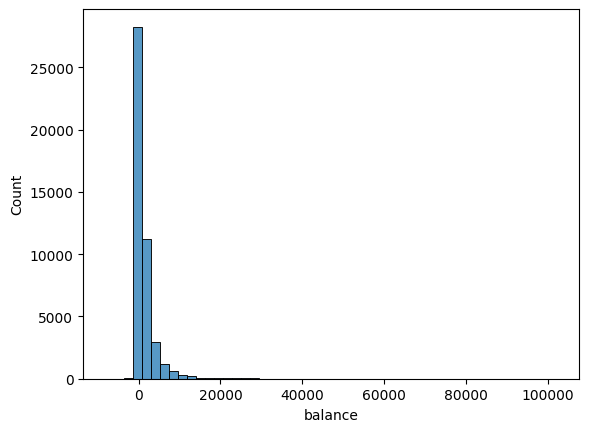

In [4]:
print(bank['balance'].describe())
sns.histplot(data=bank, x='balance', bins=50)

As the above histplot shows, the distribution of balance is very heavily right skewed, with many cluster around 0. This is not useful. Therefore, we will take the log of balance.

In [5]:
bank_poslog = np.array(bank[bank.balance > 0].balance)
bank_poslog = np.log(bank_poslog)
bank_neglog = np.array(bank[bank.balance < 0].balance)
bank_neglog = np.log(-bank_neglog)

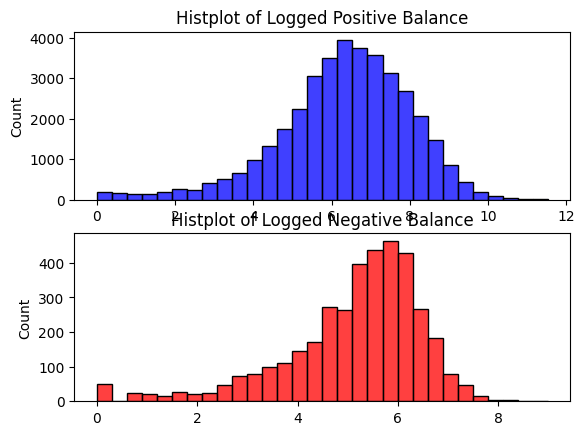

In [6]:
fig, (ax1, ax2) = plt.subplots(2)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
# plot of logged positive and negative balances
sns.histplot(data=bank_poslog, color='blue', bins=30, ax=ax1)
ax1.title.set_text('Histplot of Logged Positive Balance')
sns.histplot(data=bank_neglog, color = 'red', bins=30, ax=ax2)
ax2.title.set_text('Histplot of Logged Negative Balance')

In [7]:
bank['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

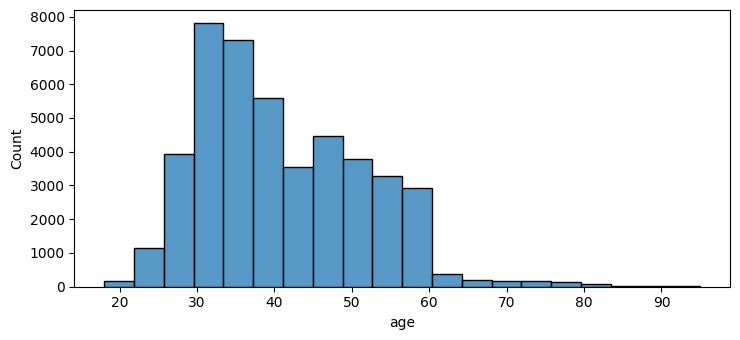

In [8]:
sns.histplot(data=bank, x='age', bins=20)

The distribution of age is fairly normal. No processing is needed.

## Encoding

In [9]:


dummy_list = []
one_hot_list = []
# check to see what vars can be dummied
for column in bank.nunique().keys():
    unique_value = bank.nunique()[column]
    if unique_value == 2:
        dummy_list.append(column)
    elif unique_value > 2 and (str(bank[column].dtype)) != 'int64':
        one_hot_list.append(column)

In [10]:
dummy_dict = {}
# Dummy encoding
# they all have yes or no, so we can do the same for all
for column in dummy_list:
    dummy_dict[column] = bank[column].eq('yes').mul(1)

In [11]:
# One-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_bank = bank[one_hot_list]
encoder.fit(one_hot_bank)
# Following line is used for validation
# encoder.inverse_transform(one_hot_bank)
one_hot_bank = encoder.transform(one_hot_bank).toarray()
one_hot_labels = encoder.categories_

counter = 0
bank_dict = {}
for i in range(0, len(one_hot_labels)):
    for column in one_hot_labels[i].tolist():
        bank_dict[column] = one_hot_bank[:,counter]
        counter += 1

In [12]:
# now creating new df
bank_dict.update(dummy_dict)
bank_coded = pd.DataFrame(bank_dict)
bank_coded.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,jun,mar,may,nov,oct,sep,default,housing,loan,y
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0


In [13]:
# # constant that represents 0
# zero_rep = -3
#
# bank_poslog = bank.balance
# bank_poslog[bank_poslog < 0] = 0  # set all negative numbers to 0
# bank_poslog += np.e ** zero_rep   # add a small constant to avoid ln(0)
# bank_poslog = np.log(bank_poslog)
#
# bank_neglog = -bank.balance
# bank_neglog[bank_neglog < 0] = 0  # set all negative numbers to 0
# bank_neglog += np.e ** zero_rep   # add a small constant to avoid ln(0)
# bank_neglog = np.log(bank_neglog)
#
# bank_coded['pos_balance'] = bank_poslog
# bank_coded['neg_balance'] = bank_neglog


# constant that represents 0
zero_rep = 2
bank_log = bank.balance
bank_log += np.e ** zero_rep
bank_coded['age'] = bank.age
bank_coded['balance'] = np.log(bank_log)

/Users/Andrew/Documents/School/Winter 2023 Graduate UCSD/COGS 118A/projects/github_pull/environment/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
# running continous vars through standard scalar
col_names = ['age']
features = bank_coded[col_names]

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['age'])
    ], remainder='passthrough')

bank_coded['age'] = ct.fit_transform(features)

# generating IQR and dropping rows which fall outside
Q1, Q3 = bank_coded["balance"].quantile([.25, .75]).tolist()
IQR = Q3 - Q1
bank_coded = bank_coded.query('(@Q1 - 1.5 * @IQR) <= balance <= (@Q3 + 1.5 * @IQR)')

# categorizing balance into quantiles
bank_coded['balance'] = pd.qcut(bank_coded['balance'], 4, labels=False)
bank_coded.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,may,nov,oct,sep,default,housing,loan,y,age,balance
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,0,0,1.606965,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0,1,0,0,0.288529,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,1,0,-0.747384,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,0,0,0.571051,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,0,0,0,-0.747384,0


In [15]:
# I added this prevent any runaway computations
# just continue running below
# Andrew
raise SystemExit(0)

SystemExit: 0

/Users/Andrew/Documents/School/Winter 2023 Graduate UCSD/COGS 118A/projects/github_pull/environment/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Principal Component Analysis

In [ ]:
# PCA processing

# Preprocess the dataframe by transforming it to the origin with the standard scaler
scaled_df = StandardScaler().fit_transform(bank_coded)

# fit the PCA function
pca = PCA()
pca.fit(scaled_df)
pca_data = pca.transform(scaled_df)

# return the principal components
num_features = bank_coded.shape[1]

percent_variance = np.round(pca.explained_variance_ratio_ * num_features, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(percent_variance)+1)]

### Plotting Results

#### 1. Scree Plot

In [ ]:
# Scree Plot
plt.bar(x=range(1,len(percent_variance)+1), height = percent_variance, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

# Models

In [16]:
# training and testing splits
# Pull Y variable out which is balance
X = bank_coded.iloc[:, 0:35].to_numpy()
y = bank_coded.iloc[:, 35:36].to_numpy().flatten()

# basic T/T/Split modeling due to large size of data
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

In [17]:
# very useful function I built using a combination of templates from sklearn and other sites

def metrics_classification_scorer(y_train, y_test, y_pred, y_proba, show_stats = True, save_auc = False):
    """

    :param y_test: your testing data
    :param y_pred: your predictions generated from classifier
    :param y_proba: your probabilities generated from classifier
    :param show_stats: default is True, shows ROC Curve, and all other Metrics
    :param save_auc: saves AUC score if desired (must write to variable)
    :return: plots of ROC curve, Conf Matrix Metrics, and AUC Score
    """

    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    # y_onehot_test.shape  # (n_samples, n_classes)

    if show_stats:
        RocCurveDisplay.from_predictions(
            y_onehot_test.ravel(),
            y_proba.ravel(),
            name="micro-average OvR",
            color="darkorange",
        )
        plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
        plt.axis("square")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
        plt.legend()
        plt.show()

    micro_roc_auc_ovr = roc_auc_score(
        y_test,
        y_proba,
        multi_class="ovr",
        average="micro",
    )

    if show_stats:
        print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}\n")
        print(f"Test Set Accuracy : {accuracy_score(y_test, y_pred) * 100} %\n")
        print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")


    # saves auc score if desired
    if save_auc: return micro_roc_auc_ovr

In [ ]:
# ohhhhhh. Oh my gosh I'm so stupid
# guys, we are we trying to use SVMs to classify more than two groups???
# also no need for more than one fold (train test), due to data size and compute time
# We can't use this unless we try splitting the groups ala one v. rest or KNN
# trying again but with one v rest using SVM (rbf)

# should take about 3.5 minutes for a 4 core, ~3ghz machine with fast RAM
svm_clf = OneVsRestClassifier(estimator = SVC(probability = True, random_state = 1, kernel = 'rbf'), verbose = 3, n_jobs = 4)
svm_clf.fit(X_train_bank, y_train_bank)
svm_y_predict = svm_clf.predict(X_test_bank) # both predictions take around 3 min
svm_y_prob = svm_clf.predict_proba(X_test_bank)

svm_auc = metrics_classification_scorer(y_train_bank, y_test_bank, svm_y_predict, svm_y_prob, save_auc = True)

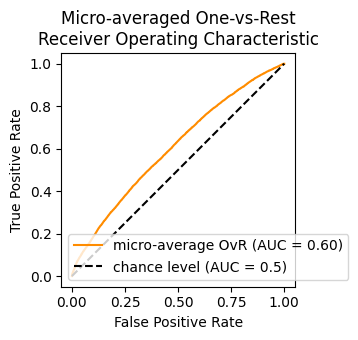

Micro-averaged One-vs-Rest ROC AUC score:
0.60

Test Set Accuracy : 34.12176960140167 %

Classification Report : 

              precision    recall  f1-score   support

           0       0.35      0.39      0.37      3434
           1       0.31      0.33      0.32      3420
           2       0.30      0.16      0.21      3421
           3       0.38      0.48      0.42      3423

    accuracy                           0.34     13698
   macro avg       0.33      0.34      0.33     13698
weighted avg       0.33      0.34      0.33     13698



In [18]:
# let's try using a logit, max iterations needed to be raised due to terrible convergence rate
# indicating this will not end with good test results...
logit_fitted = LogisticRegression(max_iter = 1000).fit(X_train_bank, y_train_bank)
logit_y_pred = logit_fitted.predict(X_test_bank)
logit_y_prob = logit_fitted.predict_proba(X_test_bank)

logit_auc = metrics_classification_scorer(y_train_bank, y_test_bank, logit_y_pred, logit_y_prob, save_auc = True)

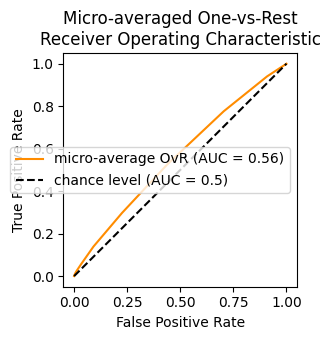

Micro-averaged One-vs-Rest ROC AUC score:
0.56

Test Set Accuracy : 29.858373485180316 %

Classification Report : 

              precision    recall  f1-score   support

           0       0.30      0.39      0.34      3434
           1       0.27      0.29      0.28      3420
           2       0.28      0.23      0.25      3421
           3       0.35      0.29      0.31      3423

    accuracy                           0.30     13698
   macro avg       0.30      0.30      0.30     13698
weighted avg       0.30      0.30      0.30     13698



In [19]:
# what if we try KNN?
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train_bank, y_train_bank)
knn_y_pred = knn.predict(X_test_bank)
knn_y_prob = knn.predict_proba(X_test_bank)
knn_auc = metrics_classification_scorer(y_train_bank, y_test_bank, knn_y_pred, knn_y_prob, save_auc = True)

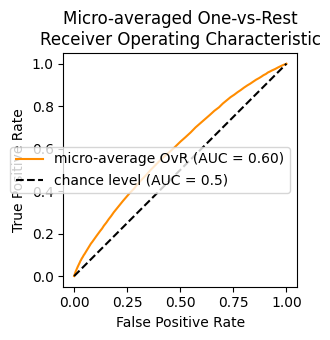

Micro-averaged One-vs-Rest ROC AUC score:
0.60

Test Set Accuracy : 33.66914878084392 %

Classification Report : 

              precision    recall  f1-score   support

           0       0.33      0.35      0.34      3434
           1       0.32      0.34      0.33      3420
           2       0.31      0.19      0.24      3421
           3       0.37      0.46      0.41      3423

    accuracy                           0.34     13698
   macro avg       0.33      0.34      0.33     13698
weighted avg       0.33      0.34      0.33     13698



In [32]:
# possible to do a hyperparameter grid search using a loop such as...
auc_list = []
n = 500 # for now I had to cap it at 500. Computer falls asleep and python hangs so this is the most it can do unless
# I run it on datahub/datacruncher
max_auc = 0

for k in list(range(1, n, 2)):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_bank, y_train_bank)
    knn_y_pred = knn.predict(X_test_bank)
    knn_y_prob = knn.predict_proba(X_test_bank)
    current_auc = metrics_classification_scorer(y_train_bank, y_test_bank, knn_y_pred, knn_y_prob, show_stats = False, save_auc = True)

    if current_auc > max_auc:
        max_auc = current_auc
        best_knn = knn
    if k % 50 == 0:
        print(k ," of ", n)

# for n = 500, k = 369 is the best with AUC of 0.59
knn_grid_y_pred = best_knn.predict(X_test_bank)
knn_grid_y_prob = best_knn.predict_proba(X_test_bank)

metrics_classification_scorer(y_train_bank, y_test_bank, knn_grid_y_pred, knn_grid_y_prob, save_auc = False)

In [ ]:
# I don't know if it's even worth it to do an ensemble, we're getting really terrible test scores.
# Might be better to drop some columns based on the PCA, and maybe try running this in a nn.



# Ethics & Privacy

The main concern with prediction with real life data is the accuracies of our models. We are uncertain about the predictive power of the models and whether these models should be used to help with future marketing. One can misuse the models trained and infer possibly inaccurate conclusions on bank marketing.

Furthermore, the data used are from a Portuguese banking institution and may not be similar with maketing data of banking institutions of other countries. The marketing data of other banking institutions in Portugal might also differ. The model created might not be accurate to predict marketing results of other banking institutions.

Therefore, We are careful to disclose that the models we will generate are for reference only and we by no means guarantee they are accurate in predicting the market reception on banking. One needs to be cautious using the models trianed to predict patterns, generalize, and infer conclusions on bank marketing.

# Team Expectations 

* We expect to make it to as many meetings as possible. If you cannot make it to a meeting due to scheduling conflict, notify as soon as possible (ideally 2 days before), so that other teammates can find a way to resolve the conflict.
* We expect everyone to share their ideas, thoughts and concerns on the projects. We want everyone to have an oppotunity to express their ideas. And it also helps to better evaluate the scope of the project.
* We expect everyone to share the workload of the project and make consistant updates to the project. This can help us guage how everyone is doing. If a person is falling behind, other teammates can have time to assist and make changes to the project.
* We expect everyone to handle conflict in ideas peacefully. Teammates should listen to both sides and come to an agreement without escalating the conflict.
* If a teammate is struggling and have difficulties on finishing their task, they should inform other teammates on their problems. Teammates are expected to provide assistance to one other and ensure everyone is on pace.
* All members will be agree on proposed changes before making any final changes to any parts of the project.
* If a member cannot make a deadline, other group members are expected to help to the best of their abilities without taking over the workload.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/17(Fri)  |  5 PM   | Brainstorm topics/questions | Brainstorm topics/questions |
| 2/22(Wed)  | 7:30 PM | Do background research on topic | Discuss ideal dataset(s) and ethics; finish project proposal |
| 2/25(Sat)  |  3 PM   | NA | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part |
| 2/28(Tue)  | 7:30 PM | Import & Wrangle Data ,do some EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan |
| 3/8(Wed)   | 7:30 PM | Finalize wrangling/EDA; Begin programming for project | Discuss/edit project code; Complete project |
| 3/14(Tue)  | 7:30 PM | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 3/22(Wed)  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="moonnote"></a>1.[^](#moon): Moon, Chris (14 Sept 2022) Average U.S. Checking Account Balance: A Demographic Breakdown. *ValuePenguin*. https://www.valuepenguin.com/banking/average-checking-account-balance.<br>
<a name="socialnote"></a>2.[^](#social): Social Security. Research, Statistics & Policy Analysis: Education and Lifetime Earnings. https://www.ssa.gov/policy/docs/research-summaries/education-earnings.html#:~:text=Men%20with%20bachelor's%20degrees%20earn,earnings%20than%20high%20school%20graduates.<br>
<a name="relationshipnote"></a>3.[^](#relationship): Social Security. Research, Statistics & Policy Analysis: The Relationship Between Retirement Savings and Marital Status Among Young Adults. https://www.ssa.gov/policy/docs/research-summaries/marital-status.html.<br>
